C:\Users\ppava\AppData\Local\Temp\ipykernel_18076\3201650863.py:8: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url, skiprows=23)  # Skip the header rows that are not part of the data


data:                      date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  \
0       10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0   
1       31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0   
2       31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0   
3       31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0   
4       31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0   
...                   ...  ...  ...    ...   ...    ...   ...    ...    ...   
248389  30-nov-2024 20:00    0  0.0      0  11.6      0  10.9   10.3   12.5   
248390  30-nov-2024 21:00    0  0.0      0  11.4      0  10.7   10.0   12.3   
248391  30-nov-2024 22:00    0  0.0      0  10.9      0  10.3    9.7   12.0   
248392  30-nov-2024 23:00    0  0.0      0  10.8      0  10.3    9.9   12.1   
248393  01-dec-2024 00:00    0  0.8      0   0.0      0   0.0    0.0    6.1   

        rhum  ... ind.3  wdsp ind.4  wddir  w

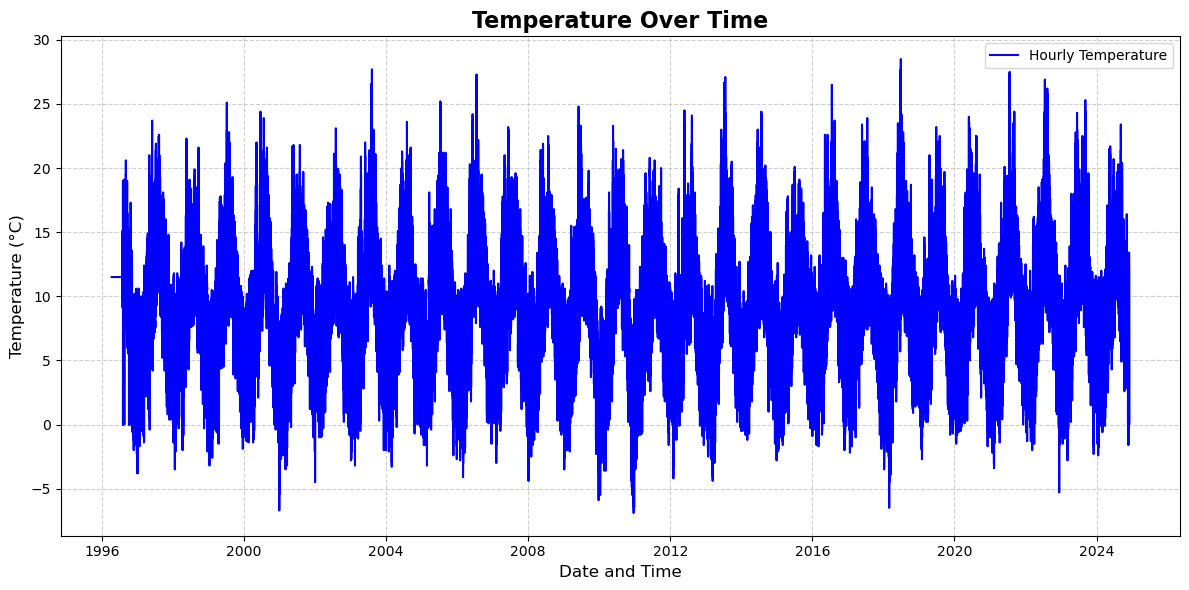

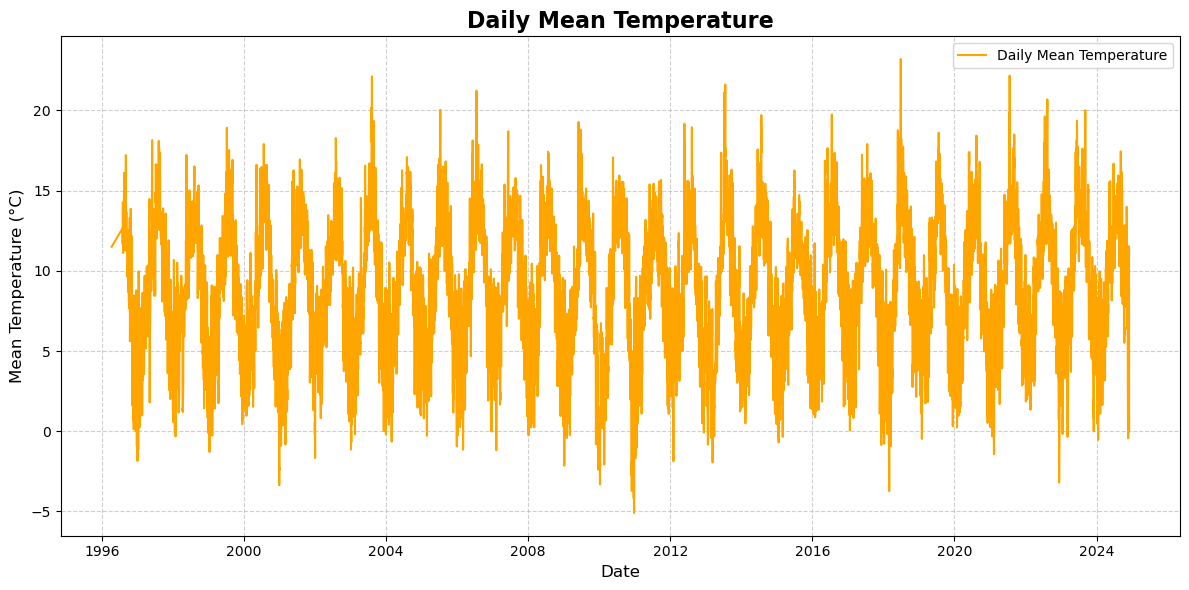

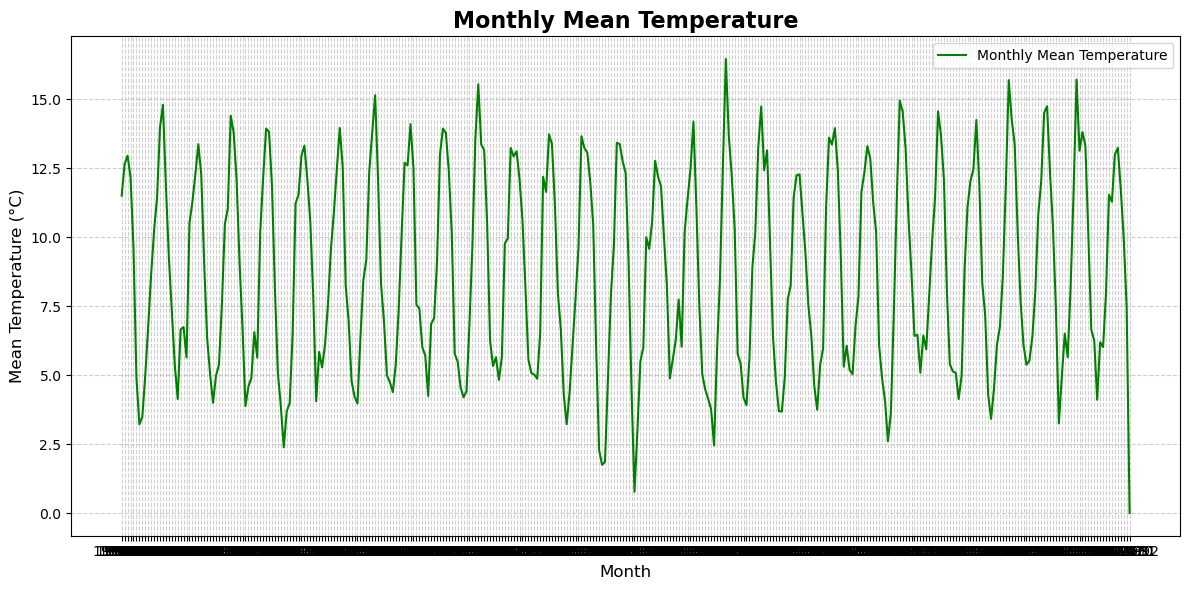

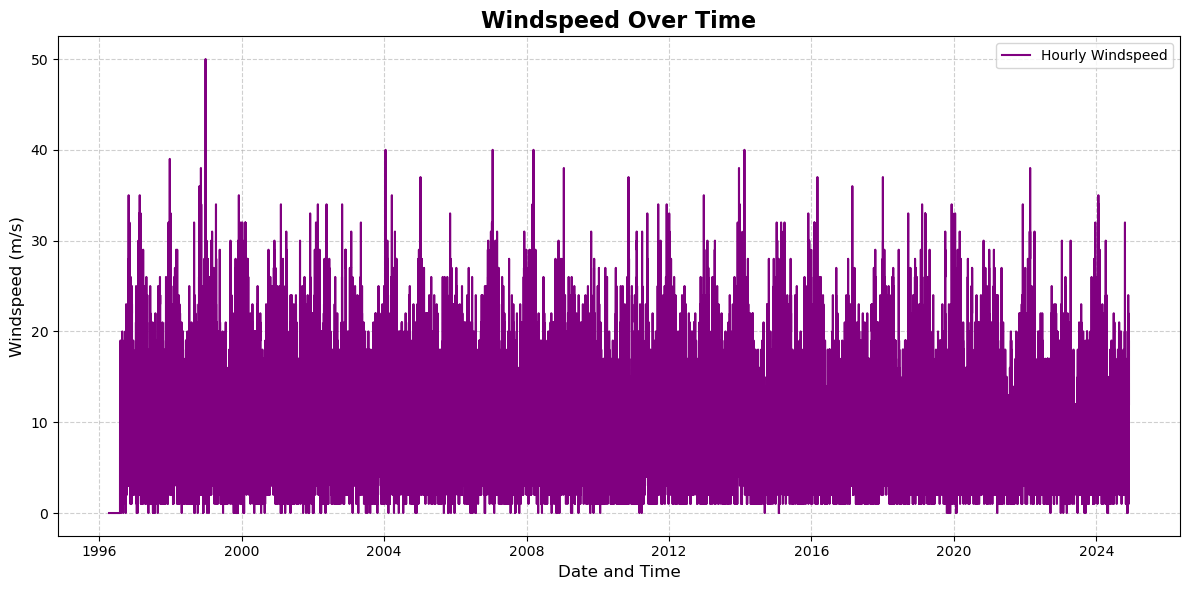

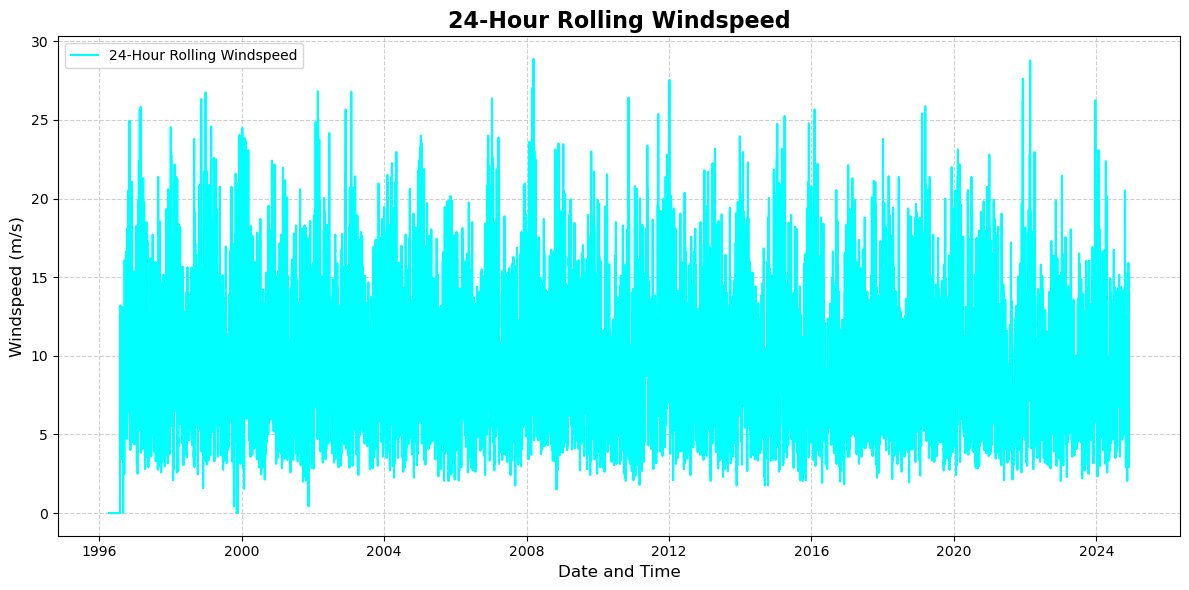

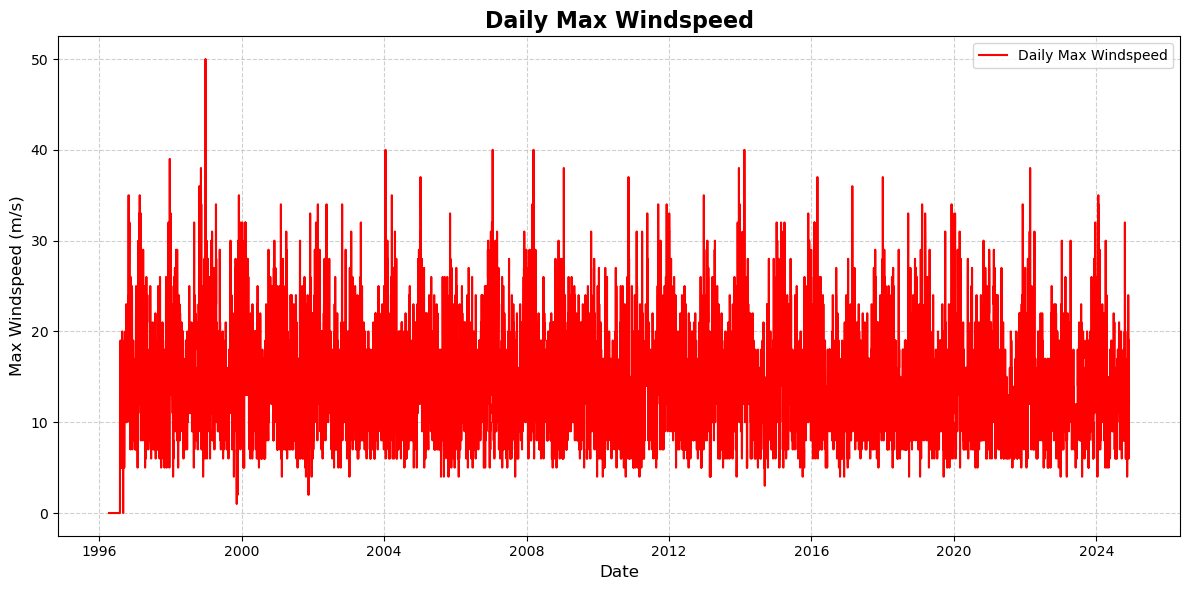

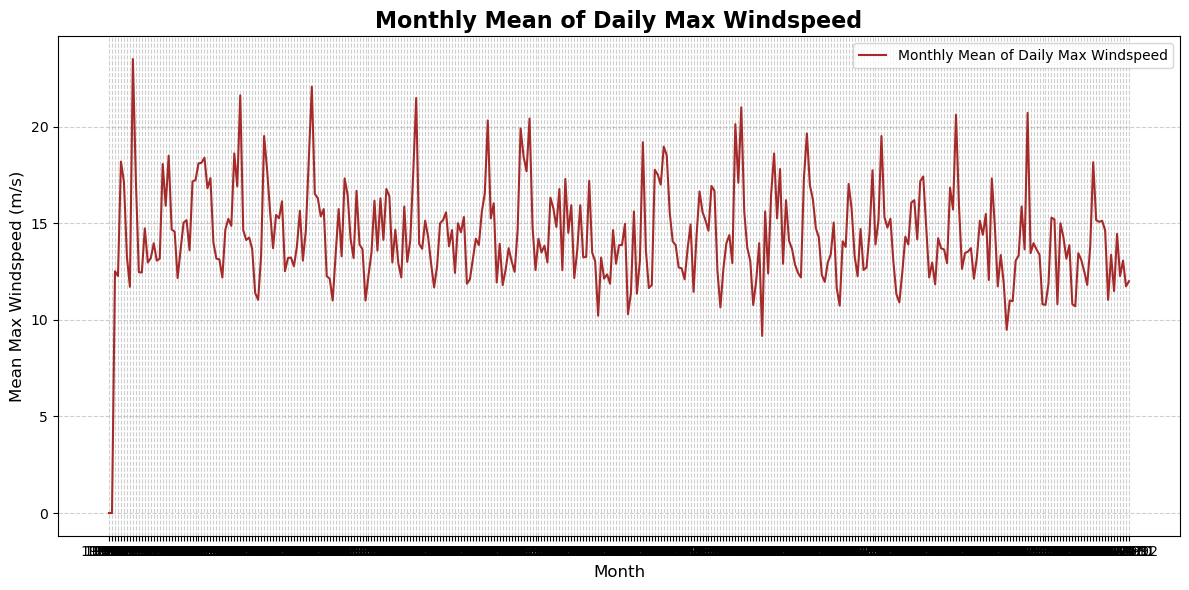

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'

#Step1: Load the data with appropriate options to handle formatting issues 
#Skip the header rows (23 rows) that are not part of the data
data = pd.read_csv(url, skiprows=23)   

print("data:",data)

# Step2: Check the 'date' column contains both date and time
if 'date' not in data.columns:
    raise ValueError("The CSV file must contain a 'date' column with datetime information.")

#Step3: Convert 'date' to datetime format
data['datetime'] = pd.to_datetime(data['date'], format='%d-%b-%Y %H:%M', errors='coerce')

print("data['datetime']:",data['datetime'])

#Step4: Drop rows with invalid datetime values
data = data.dropna(subset=['datetime'])

#Step5: Plot the temperature
data = data.sort_values(by='datetime')
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['temp'], label='Hourly Temperature', color='blue')
plt.title('Temperature Over Time', fontsize=16, weight='bold')
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#Step6: Calculate Mean temperature each day
data['date_only'] = data['datetime'].dt.date
daily_mean_temp = data.groupby('date_only')['temp'].mean()

#Step7: Plot Mean temperature each day
plt.figure(figsize=(12, 6))
plt.plot(daily_mean_temp.index, daily_mean_temp, label='Daily Mean Temperature', color='orange')
plt.title('Daily Mean Temperature', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#Step8: Calculate Mean temperature for each month
data['month'] = data['datetime'].dt.to_period('M')
monthly_mean_temp = data.groupby('month')['temp'].mean()

#Step9: Plot Mean temperature for each month
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_temp.index.astype(str), monthly_mean_temp, label='Monthly Mean Temperature', color='green')
plt.title('Monthly Mean Temperature', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#Step10: Calculate Windspeed
data['wdsp'] = pd.to_numeric(data['wdsp'], errors='coerce')

#Step11: Plot Calculated Windspeed
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['wdsp'], label='Hourly Windspeed', color='purple')
plt.title('Windspeed Over Time', fontsize=16, weight='bold')
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Windspeed (m/s)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#Step12: Calculate Rolling windspeed (24-hour average)
data['rolling_wdsp'] = data['wdsp'].rolling(window=24, min_periods=1).mean()

#Step11: Plot Rolling windspeed (24-hour average)
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['rolling_wdsp'], label='24-Hour Rolling Windspeed', color='cyan')
plt.title('24-Hour Rolling Windspeed', fontsize=16, weight='bold')
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Windspeed (m/s)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#Step12: Calculate Max windspeed for each day
daily_max_wdsp = data.groupby('date_only')['wdsp'].max()

#Step13: Plot Max windspeed for each day
plt.figure(figsize=(12, 6))
plt.plot(daily_max_wdsp.index, daily_max_wdsp, label='Daily Max Windspeed', color='red')
plt.title('Daily Max Windspeed', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Max Windspeed (m/s)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


#Step14: Calculate Monthly mean of the daily max windspeeds
monthly_mean_max_wdsp = daily_max_wdsp.groupby(pd.to_datetime(daily_max_wdsp.index).to_period('M')).mean()

#Step15: Plot Monthly mean of the daily max windspeeds
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_max_wdsp.index.astype(str), monthly_mean_max_wdsp, label='Monthly Mean of Daily Max Windspeed', color='brown')
plt.title('Monthly Mean of Daily Max Windspeed', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mean Max Windspeed (m/s)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\ppava\AppData\Local\Temp\ipykernel_18076\159776247.py:9: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url, skiprows=23)


data:                      date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  \
0       10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0   
1       31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0   
2       31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0   
3       31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0   
4       31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0   
...                   ...  ...  ...    ...   ...    ...   ...    ...    ...   
248389  30-nov-2024 20:00    0  0.0      0  11.6      0  10.9   10.3   12.5   
248390  30-nov-2024 21:00    0  0.0      0  11.4      0  10.7   10.0   12.3   
248391  30-nov-2024 22:00    0  0.0      0  10.9      0  10.3    9.7   12.0   
248392  30-nov-2024 23:00    0  0.0      0  10.8      0  10.3    9.9   12.1   
248393  01-dec-2024 00:00    0  0.8      0   0.0      0   0.0    0.0    6.1   

        rhum  ... ind.3  wdsp ind.4  wddir  w

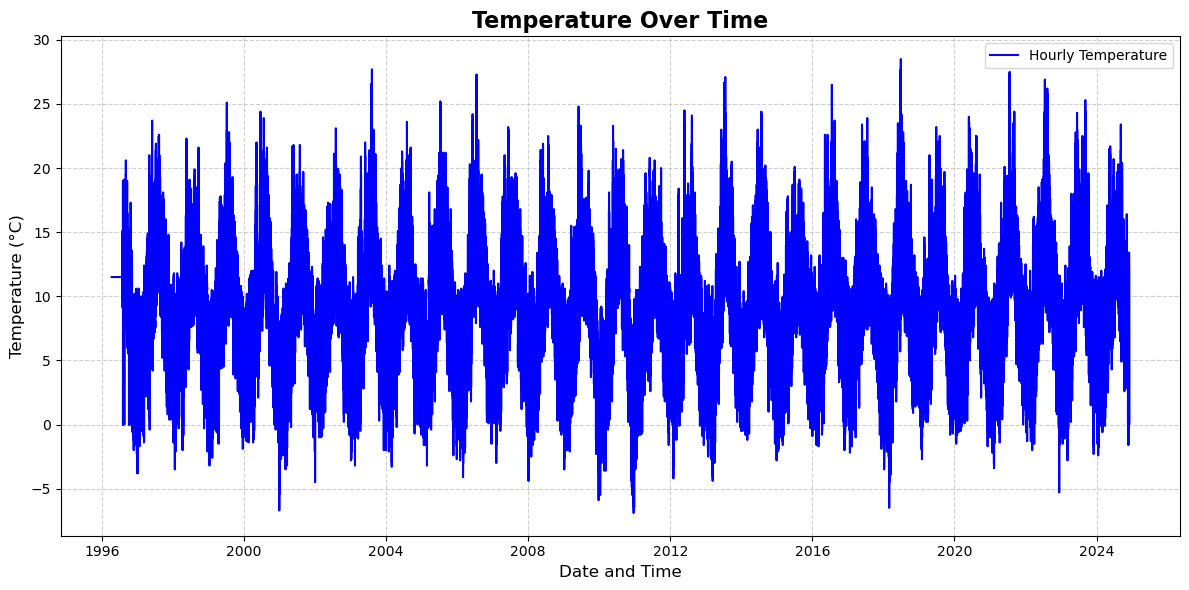

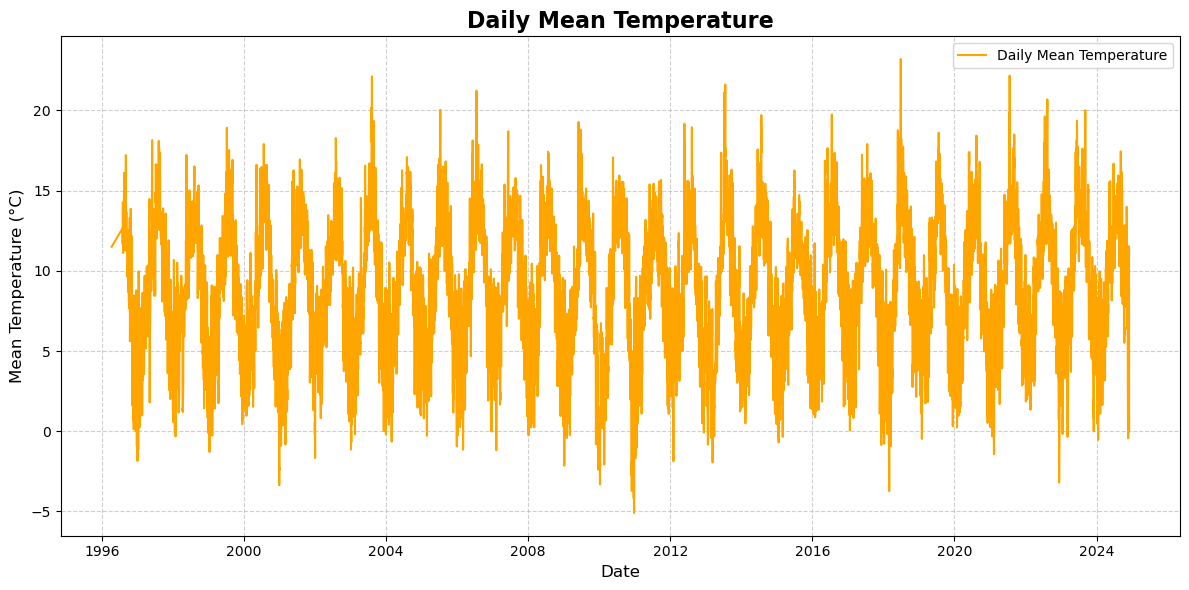

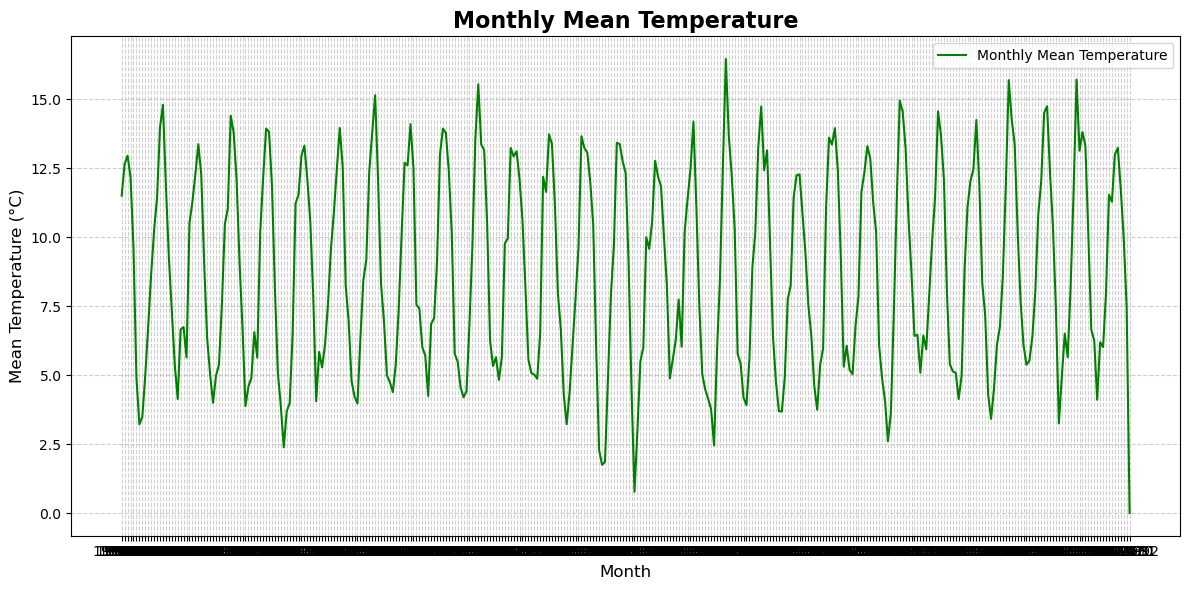

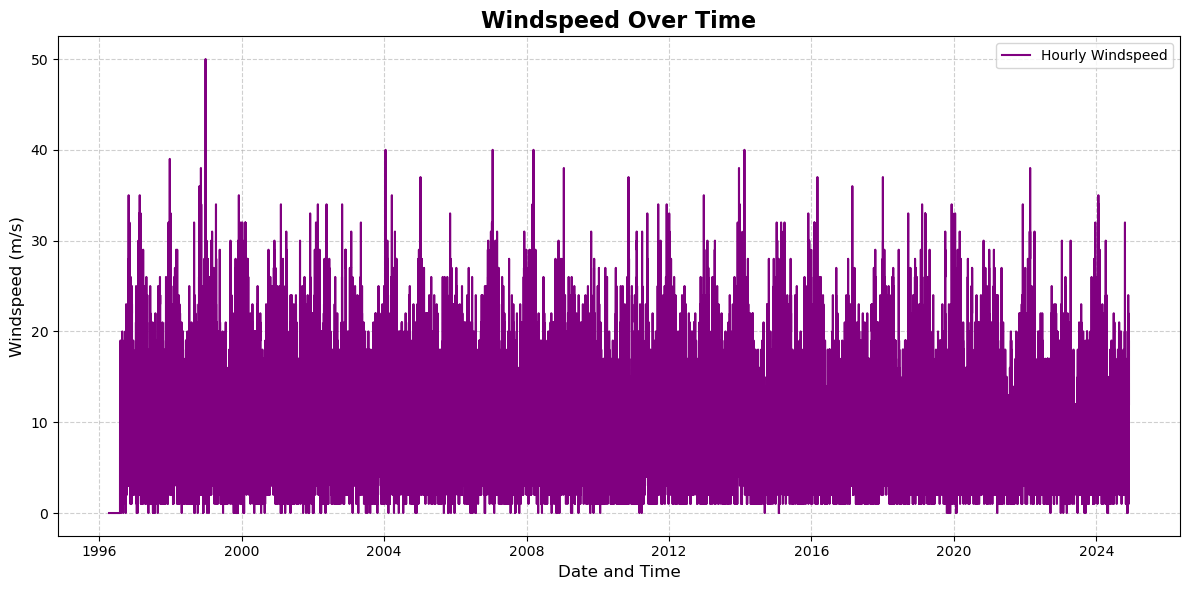

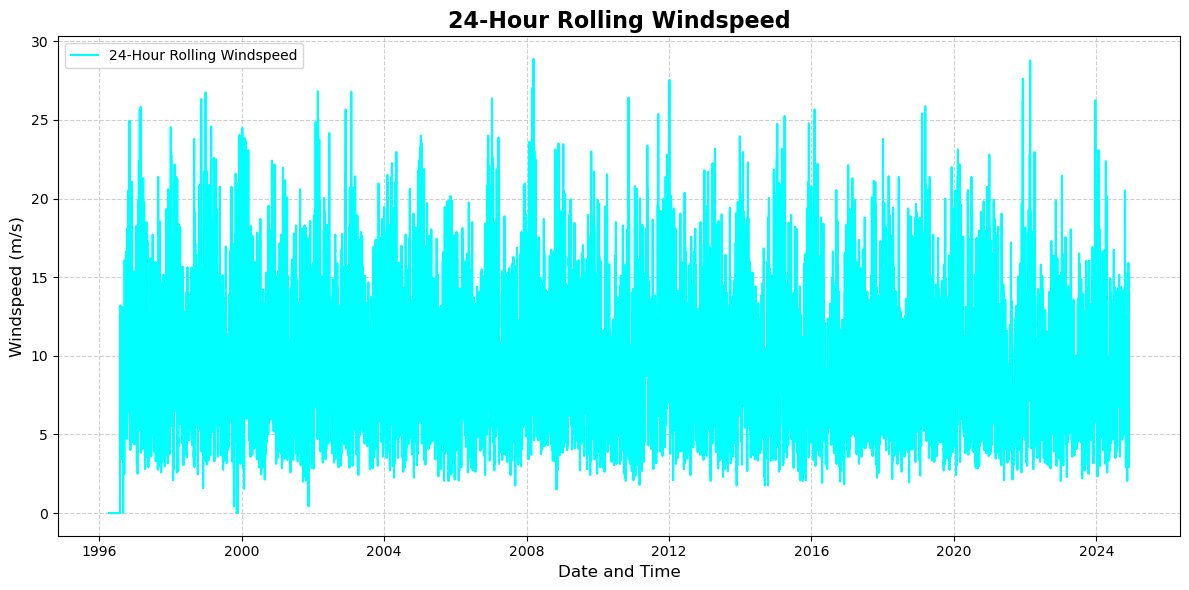

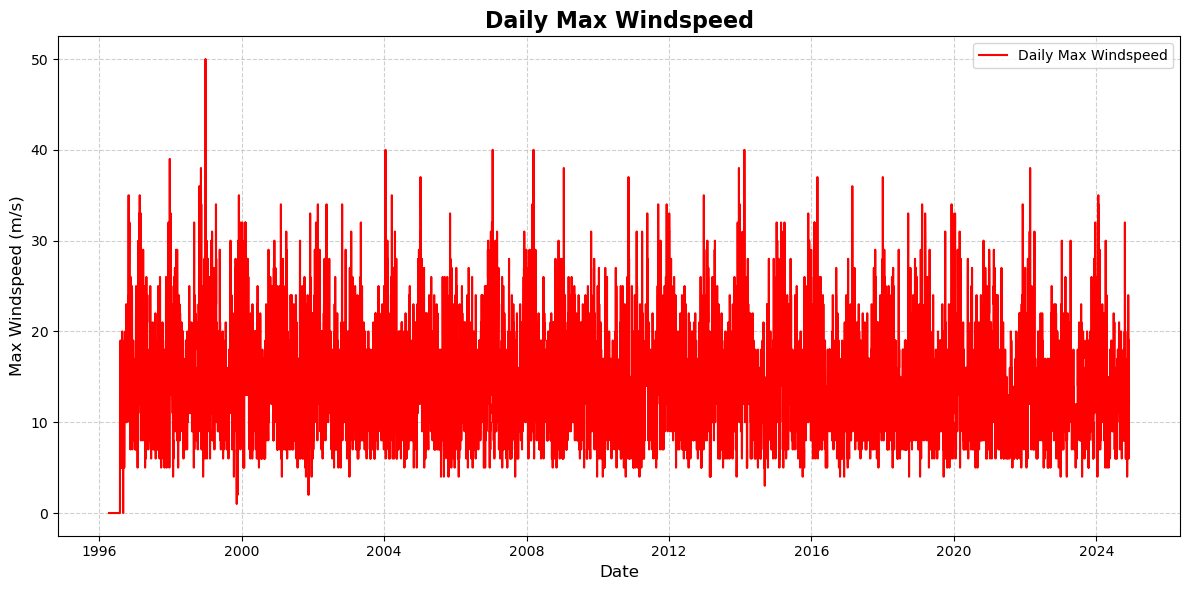

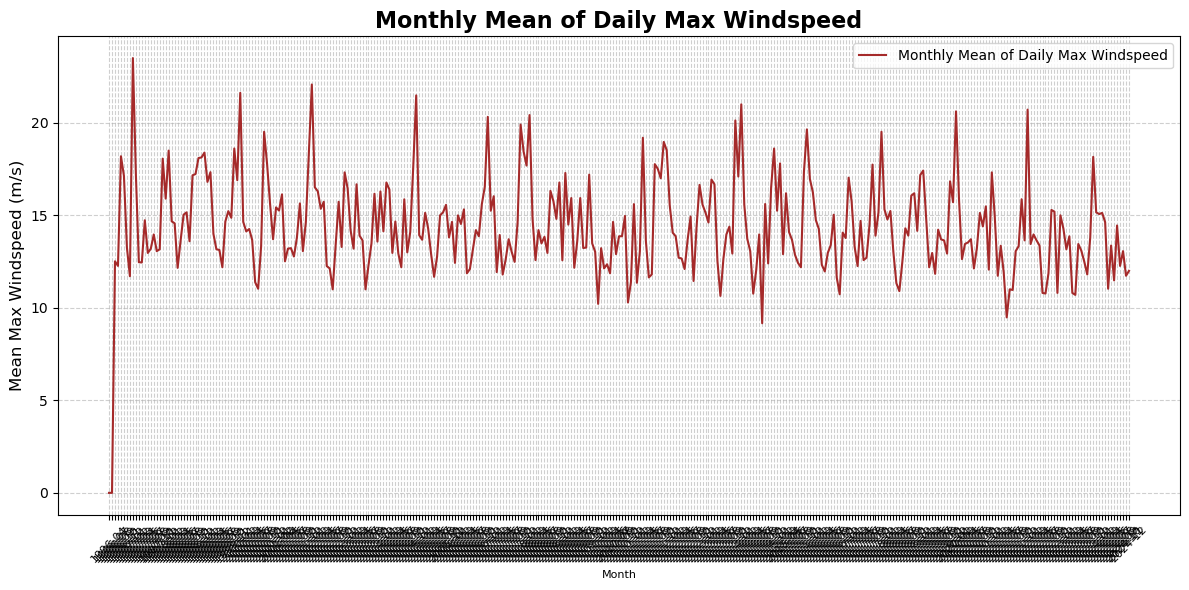

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'

#Step1: Load the data with appropriate options to handle formatting issues 
#Skip the header rows (23 rows) that are not part of the data
data = pd.read_csv(url, skiprows=23)   

print("data:",data)

# Step2: Check the 'date' column contains both date and time
if 'date' not in data.columns:
    raise ValueError("The CSV file must contain a 'date' column with datetime information.")

#Step3: Convert 'date' to datetime format
data['datetime'] = pd.to_datetime(data['date'], format='%d-%b-%Y %H:%M', errors='coerce')

print("data['datetime']:",data['datetime'])

#Step4: Drop rows with invalid datetime values
data = data.dropna(subset=['datetime'])


# Plot: The temperature
data = data.sort_values(by='datetime')
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['temp'], label='Hourly Temperature', color='blue')
plt.title('Temperature Over Time', fontsize=16, weight='bold')
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Mean temperature each day
data['date_only'] = data['datetime'].dt.date
daily_mean_temp = data.groupby('date_only')['temp'].mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_mean_temp.index, daily_mean_temp, label='Daily Mean Temperature', color='orange')
plt.title('Daily Mean Temperature', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Mean temperature for each month
data['month'] = data['datetime'].dt.to_period('M')
monthly_mean_temp = data.groupby('month')['temp'].mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_temp.index.astype(str), monthly_mean_temp, label='Monthly Mean Temperature', color='green')
plt.title('Monthly Mean Temperature', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Windspeed (missing data handled)
data['wdsp'] = pd.to_numeric(data['wdsp'], errors='coerce')
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['wdsp'], label='Hourly Windspeed', color='purple')
plt.title('Windspeed Over Time', fontsize=16, weight='bold')
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Windspeed (m/s)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Rolling windspeed (24-hour average)
data['rolling_wdsp'] = data['wdsp'].rolling(window=24, min_periods=1).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['rolling_wdsp'], label='24-Hour Rolling Windspeed', color='cyan')
plt.title('24-Hour Rolling Windspeed', fontsize=16, weight='bold')
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Windspeed (m/s)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Max windspeed for each day
daily_max_wdsp = data.groupby('date_only')['wdsp'].max()
plt.figure(figsize=(12, 6))
plt.plot(daily_max_wdsp.index, daily_max_wdsp, label='Daily Max Windspeed', color='red')
plt.title('Daily Max Windspeed', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Max Windspeed (m/s)', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Monthly mean of the daily max windspeeds
monthly_mean_max_wdsp = daily_max_wdsp.groupby(pd.to_datetime(daily_max_wdsp.index).to_period('M')).mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_max_wdsp.index.astype(str), monthly_mean_max_wdsp, label='Monthly Mean of Daily Max Windspeed', color='brown')
plt.title('Monthly Mean of Daily Max Windspeed', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=8)
plt.ylabel('Mean Max Windspeed (m/s)', fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
